<a href="https://colab.research.google.com/github/alfa33333/NN_notebooks/blob/main/QuickCNNTfv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Python optimisation variables
learning_rate = 0.0001
epochs = 10
batch_size = 50

# declare the training data placeholders
# input x - for 28 x 28 pixels = 784 - this is the flattened image data that is drawn from 
# mnist.train.nextbatch()
x = tf.placeholder(tf.float32, [None, 784])
# dynamically reshape the input
x_shaped = tf.reshape(x, [-1, 28, 28, 1])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

TensorFlow 1.x selected.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as off

In [2]:
def create_new_conv_layer(input_data, num_input_channels, num_filters, filter_shape, pool_shape, name):
    # setup the filter input shape for tf.nn.conv_2d
    conv_filt_shape = [filter_shape[0], filter_shape[1], num_input_channels,
                      num_filters]

    # initialise weights and bias for the filter
    weights = tf.Variable(tf.truncated_normal(conv_filt_shape, stddev=0.03),
                                      name=name+'_W')
    bias = tf.Variable(tf.truncated_normal([num_filters]), name=name+'_b')

    # setup the convolutional layer operation
    out_layer = tf.nn.conv2d(input_data, weights, [1, 1, 1, 1], padding='SAME')

    # add the bias
    out_layer += bias

    # apply a ReLU non-linear activation
    out_layer = tf.nn.relu(out_layer)

    # now perform max pooling
    ksize = [1, pool_shape[0], pool_shape[1], 1]
    strides = [1, 2, 2, 1]
    out_layer = tf.nn.max_pool(out_layer, ksize=ksize, strides=strides, 
                               padding='SAME')

    return out_layer

In [3]:
# create some convolutional layers
layer1 = create_new_conv_layer(x_shaped, 1, 32, [5, 5], [2, 2], name='layer1')
layer2 = create_new_conv_layer(layer1, 32, 64, [5, 5], [2, 2], name='layer2')

In [4]:
flattened = tf.reshape(layer2, [-1, 7 * 7 * 64])

In [5]:
# setup some weights and bias values for this layer, then activate with ReLU
wd1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1000], stddev=0.03), name='wd1')
bd1 = tf.Variable(tf.truncated_normal([1000], stddev=0.01), name='bd1')
dense_layer1 = tf.matmul(flattened, wd1) + bd1
dense_layer1 = tf.nn.relu(dense_layer1)

In [6]:
# another layer with softmax activations
wd2 = tf.Variable(tf.truncated_normal([1000, 10], stddev=0.03), name='wd2')
bd2 = tf.Variable(tf.truncated_normal([10], stddev=0.01), name='bd2')
dense_layer2 = tf.matmul(dense_layer1, wd2) + bd2
y_ = tf.nn.softmax(dense_layer2)

In [7]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=dense_layer2, labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [33]:
# add an optimiser
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# setup the initialisation operator
init_op = tf.global_variables_initializer()

prediction=tf.argmax(y_,1)
with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
    total_batch = int(len(mnist.train.labels) / batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            _, c = sess.run([optimiser, cross_entropy], 
                            feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        test_acc = sess.run(accuracy, 
                       feed_dict={x: mnist.test.images, y: mnist.test.labels})
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost), "test accuracy: {:.3f}".format(test_acc))

    print("\nTraining complete!")
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
    prediction_array = prediction.eval(feed_dict={x: mnist.test.images})
    print( "predictions", prediction_array[0])

Epoch: 1 cost = 0.713 test accuracy: 0.940
Epoch: 2 cost = 0.163 test accuracy: 0.968
Epoch: 3 cost = 0.099 test accuracy: 0.974
Epoch: 4 cost = 0.075 test accuracy: 0.980
Epoch: 5 cost = 0.059 test accuracy: 0.984
Epoch: 6 cost = 0.050 test accuracy: 0.985
Epoch: 7 cost = 0.043 test accuracy: 0.988
Epoch: 8 cost = 0.036 test accuracy: 0.987
Epoch: 9 cost = 0.030 test accuracy: 0.986
Epoch: 10 cost = 0.026 test accuracy: 0.989

Training complete!
0.9894
predictions 7


In [38]:
import matplotlib.pyplot as plt

def plot_mnist_image(images, label_true, label_predict, img_shape=(28, 28)):
    fig, axes = plt.subplots(3, 3,figsize=(10,10)) # 3x3 plots

    for i, ax in enumerate(axes.flat):
        # plot image
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # show true and predicted labels
        if label_predict is None:
            xlabel = "True: {}".format(label_true[i])
        else:
            xlabel = "True: {}, Predict: {}".format(label_true[i], label_predict[i])

        ax.set_xlabel(xlabel)

    plt.show()

In [22]:
# MNIST image shape is 28x28 pixel
img_size = 28
img_shape = (img_size, img_size) # shape of image
img_flat_size = img_size * img_size # size after flatting the matrix
num_labels = 10 # i.e. 0-9

In [25]:
import numpy as np

In [27]:
mnist.test.numbers = np.array([label.argmax() for label in mnist.test.labels])

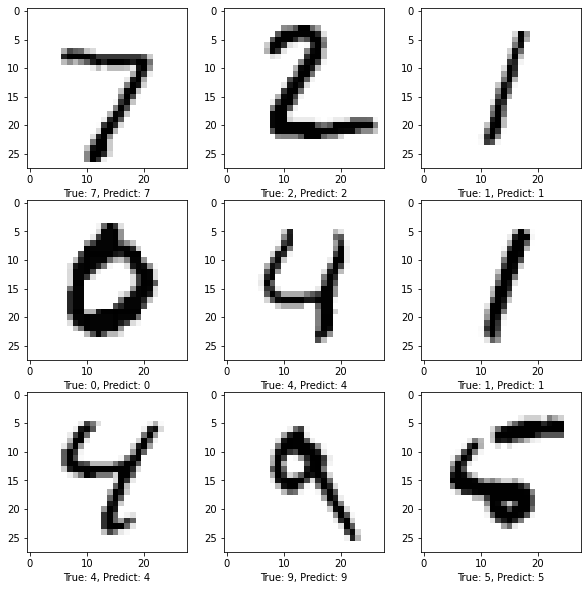

In [39]:
# plot first 9 images
images = mnist.test.images[0:9]
true_images = mnist.test.numbers[0:9]
# plot images
plot_images = plot_mnist_image(images=images,
    label_true=true_images,
    label_predict=prediction_array[0:9],  # as no prediction made yet
    img_shape=img_shape
)